# Data Analysis Notebook 

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


## EE of the Cut for large range of system sizes


In [2]:
Sys.CPU_THREADS

6

In [3]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
dep_path = "../AdditionalStructure/Julia/"
include("$(dep_path)NewTypes.jl")
include("$(dep_path)BitStringOps.jl")
include("$(dep_path)Measurements.jl")
include("$(dep_path)MICModels.jl")
include("$(dep_path)ModelRuns.jl")
include("$(dep_path)HelperTools.jl")
include("$(dep_path)Iterators.jl");

exp_index = 1
dir_extension = "_2024-06-04"
file_prefix = "out/"
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


exp_index: 1
p_b: 0.05
TEE: [5, 11, 12, 7, 7, 15, 16, 8, 11, 16, 11, 14, 15, 5, 13, 19, 16, 13, 12, 8, 7, 8, 10, 9, 8, 9, 16, 6, 9, 10, 9, 9, 14, 14, 14, 8, 11, 4, 11, 13, 8, 9, 11, 13, 8, 12, 16, 12, 13, 9, 14, 11, 8, 18, 12, 10, 6, 11, 3, 9, 16, 9, 10, 11, 13, 12, 18, 8, 5, 6, 7, 13, 21, 12, 9, 7, 13, 11, 12, 10, 10, 11, 11, 12, 8, 9, 5, 13, 13, 11, 16, 5, 8, 14, 8, 13, 9, 7, 8, 11]
p_f: 0.55
L: 30
sys_type: Init_EdgeSquareLattice_KitaevDoNuT
EE_cut: [0 50 74 80 90 90 91 90 92 92 93 98 93 94 97 102 98 93 94 102 102 95 93 95 97 89 87 85 79 54 0; 0 47 70 82 86 94 98 94 99 95 99 100 100 100 100 95 97 96 91 96 91 90 94 93 90 87 87 82 78 51 0; 0 52 80 88 91 93 89 98 98 99 101 106 102 104 108 109 100 106 103 102 98 99 99 94 87 95 84 78 80 50 0; 0 52 78 78 82 89 90 92 96 99 103 100 95 95 94 89 94 96 100 96 98 91 91 89 86 84 86 89 82 53 0; 0 49 71 75 78 79 83 93 91 93 94 91 93 90 93 92 93 93 96 95 98 97 92 93 90 91 82 85 76 51 0; 0 50 80 82 92 94 95 95 98 102 103 107 104 107 103 107 104 100 

In [4]:
file_prefix = "out/"
all_data = []

model_data_dict = Dict()

for exp_index in 1:800
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
        model_data_dict[(data["L"], data["p_b"], data["p_f"], data["p_fe"])] = data
    end
end
print("data sets read: ",length(all_data))

all_sizes = sort(collect(keys(model_data_dict)))

data sets read: 400

8-element Vector{Any}:
 (30, 0.025, 0.55, 0.1)
 (30, 0.05, 0.55, 0.1)
 (42, 0.025, 0.55, 0.1)
 (42, 0.05, 0.55, 0.1)
 (54, 0.025, 0.55, 0.1)
 (54, 0.05, 0.55, 0.1)
 (66, 0.025, 0.55, 0.1)
 (66, 0.05, 0.55, 0.1)

In [5]:
model_data_dict[(30, 0.05, 0.55, 0.1)]

Dict{String, Any} with 12 entries:
  "exp_index"   => 393
  "p_b"         => 0.05
  "TEE"         => [4, 10, 8, 10, 9, 8, 7, 8, 10, 7  …  11, 6, 9, 8, 9, 15, 12,…
  "p_f"         => 0.55
  "L"           => 30
  "sys_type"    => "Init_EdgeSquareLattice_KitaevDoNuT"
  "EE_cut"      => [0 49 … 45 0; 0 45 … 48 0; … ; 0 51 … 51 0; 0 50 … 51 0]
  "t_mmt"       => [70, 90, 110, 130, 150, 170, 190, 210, 230, 250  …  1870, 18…
  "p_fe"        => 0.1
  "filename"    => "/mnt/users/jovanovic/GitHub/Subsystem-Code-Physics/Remote-H…
  "description" => "Single Points in the Phase Diagram, TEE and EE cut."
  "d"           => 3

In [6]:
# Observables_t_p  = []
# for data in all_data
#     if data["L"] == 15
#         for i in 1:avr_back
#             push!(Observables_t_p, data["TEE"][end+1-i, :, :])
#         end
#     end
# end
# Observables_t_p_15  = cat(dims= 3, Observables_t_p...) # implement time averaging

In [7]:
function give_type(data)
    return (data["L"], data["p_b"], data["p_f"], data["p_fe"])
end

give_type (generic function with 1 method)

In [8]:
avr_back = "all" # I will not use this at the moment!

CUT_dict_helper = Dict(
    size_key => [] for size_key in keys(model_data_dict)
)

for data in all_data
    size_key = give_type(data)
    push!(CUT_dict_helper[size_key], permutedims(data["EE_cut"],(2,1)))
end

CUT_dict = Dict()

for size_key in all_sizes
    CUT_dict[size_key] = cat(dims= 2, CUT_dict_helper[size_key]...)
end

CUT_means = Dict()
CUT_vars = Dict()
CUT_errs = Dict()
CUT_medians = Dict()

for size_key in all_sizes
    CUT_means[size_key] = mean(CUT_dict[size_key], dims = 2)
    CUT_vars[size_key] = var(CUT_dict[size_key], dims = 2)
    CUT_errs[size_key] = std(CUT_dict[size_key], dims = 2) / sqrt(size(CUT_dict[size_key], 2))
    CUT_medians[size_key] = median(CUT_dict[size_key], dims = 2)
end

CUT_Stats = Dict(
    "mean" => CUT_means,
    "var" => CUT_vars,
    "err" => CUT_errs,
    "median" => CUT_medians
)


Dict{String, Dict{Any, Any}} with 4 entries:
  "median" => Dict((30, 0.05, 0.55, 0.1)=>[0.0; 50.0; … ; 50.0; 0.0;;], (42, 0.…
  "err"    => Dict((30, 0.05, 0.55, 0.1)=>[0.0; 0.0401287; … ; 0.0398316; 0.0;;…
  "mean"   => Dict((30, 0.05, 0.55, 0.1)=>[0.0; 49.9318; … ; 50.002; 0.0;;], (4…
  "var"    => Dict((30, 0.05, 0.55, 0.1)=>[0.0; 8.05156; … ; 7.93278; 0.0;;], (…

In [9]:
all_sizes

8-element Vector{Any}:
 (30, 0.025, 0.55, 0.1)
 (30, 0.05, 0.55, 0.1)
 (42, 0.025, 0.55, 0.1)
 (42, 0.05, 0.55, 0.1)
 (54, 0.025, 0.55, 0.1)
 (54, 0.05, 0.55, 0.1)
 (66, 0.025, 0.55, 0.1)
 (66, 0.05, 0.55, 0.1)

In [16]:
stat = "mean"
ribbon = "err"

plot()
for size_key in all_sizes[1:2:end]
    L, p_b, p_f, p_fe = size_key
    x_axis = get_subdiv_array(L, "all") .- L/2
    x_axis = x_axis./L
    y_axis = CUT_Stats[stat][size_key][:] .- L # SAGE to inform which subleading term to cancel
    volume_scale = L^2
    area_scale = L
    critical_scale = L*log2(L)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][:]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

p_2 = plot!()

stat = "mean"
ribbon = "err"


plot()
for size_key in all_sizes[2:2:end]
    L, p_b, p_f, p_fe = size_key
    x_axis = get_subdiv_array(L, "all") .- L/2
    x_axis = x_axis./L
    y_axis = CUT_Stats[stat][size_key][:] .- L # SAGE to inform which subleading term to cancel
    volume_scale = L^2
    area_scale = L
    critical_scale = L*log2(L)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][:]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

p_1 = plot!()

plot(p_1, p_2, layout = (1,2), size = (1300, 500), xlabel = "relative position of the cut", ylabel = "EE/L", margin = 10Plots.mm, dpi = 300, legend = :bottomleft)
savefig("Plots/stabilise.pdf")

"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/Plots/stabilise.pdf"

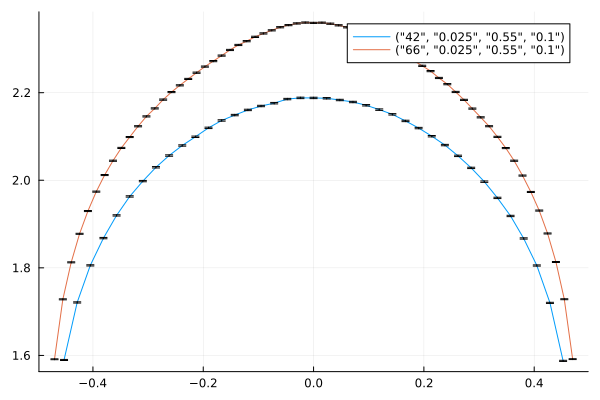

In [11]:
stat = "mean"
ribbon = "err"


plot()
for size_key in all_sizes[3:4:end]
    L, p_b, p_f, p_fe = size_key
    x_axis = get_subdiv_array(L, "all") .- L/2
    x_axis = x_axis./L
    y_axis = CUT_Stats[stat][size_key][:] .- L # SAGE to inform which subleading term to cancel
    volume_scale = L^2
    area_scale = L
    critical_scale = L*log2(L)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][:]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()

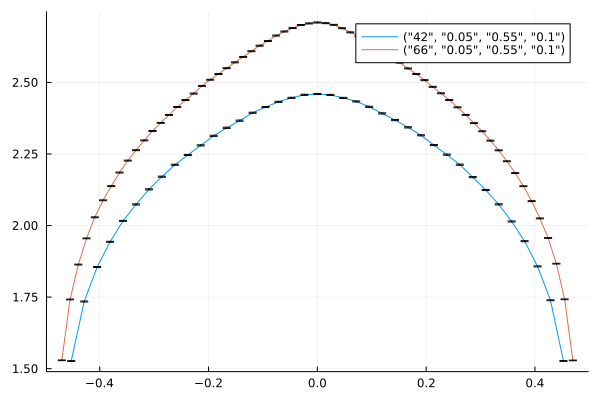

In [12]:
stat = "mean"
ribbon = "err"


plot()
for size_key in all_sizes[4:4:end]
    L, p_b, p_f, p_fe = size_key
    x_axis = get_subdiv_array(L, "all") .- L/2
    x_axis = x_axis./L
    y_axis = CUT_Stats[stat][size_key][:] .- L # SAGE to inform which subleading term to cancel
    volume_scale = L^2
    area_scale = L
    critical_scale = L*log2(L)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][:]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()